In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('used_car_dataset.csv')

In [3]:
df.head(10)

,Unnamed: 0,brand,currency,description,fuel_type,item_condition,manufacturer,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,0,MG,PKR,MG HS 2021 for sale in Lahore,Petrol,used,MG,"6,000 km",2021.0,6525000.0,1490cc,Automatic
1,1,Toyota,PKR,Toyota Aygo 2012 for sale in Islamabad,Petrol,used,Toyota,"68,000 km",2012.0,1625000.0,1000cc,Manual
2,2,Honda,PKR,Honda City 2015 for sale in Lahore,Petrol,used,Honda,"150,000 km",2015.0,2550000.0,1300cc,Automatic
3,3,KIA,PKR,KIA Sorento 2022 for sale in Sialkot,Petrol,used,KIA,"18,000 km",2022.0,9000000.0,3500cc,Automatic
4,4,Toyota,PKR,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,used,Toyota,"110,000 km",2015.0,3350000.0,1300cc,Automatic
5,5,Nissan,PKR,Nissan March 2004 for sale in Karachi,Petrol,used,Nissan,"100,000 km",2004.0,1050000.0,1000cc,Automatic
6,6,Honda,PKR,Honda Civic 2021 for sale in Islamabad,Petrol,used,Honda,"20,500 km",2021.0,6275000.0,1800cc,Automatic
7,7,Suzuki,PKR,Suzuki Cultus 2008 for sale in Islamabad,Petrol,used,Suzuki,"25,025 km",2008.0,1025000.0,1000cc,Manual
8,8,Honda,PKR,Honda City 2018 for sale in Rawalpindi,Petrol,used,Honda,"88,000 km",2018.0,3150000.0,1300cc,Manual
9,9,Honda,PKR,Honda Civic 2018 for sale in Rawalpindi,Petrol,used,Honda,"70,000 km",2018.0,4990000.0,1800cc,Automatic


In [4]:
df.shape

(60109, 12)

In [5]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)

In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df['Car']=df['description'].str.split('\d').str[0]

In [8]:
df['city']=df['description'].str.rsplit(n=1).str[-1]


In [9]:
df=df.drop('description',axis=1)

In [10]:
df=df.drop(['currency','manufacturer'],axis=1)

In [11]:
df=df.drop('item_condition',axis=1)

In [12]:
df['engine']=df['vehicle_engine'].str.split('cc').str[0]

In [13]:
df=df.drop('vehicle_engine',axis=1)

In [14]:
df['km']=df['mileage_from_odometer'].str.split('km').str[0]

In [15]:
df=df.drop('mileage_from_odometer',axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60109 entries, 0 to 60108
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 60109 non-null  object 
 1   fuel_type             60109 non-null  object 
 2   model_date            60109 non-null  float64
 3   price                 60109 non-null  float64
 4   vehicle_transmission  60109 non-null  object 
 5   Car                   60109 non-null  object 
 6   city                  60109 non-null  object 
 7   engine                60109 non-null  object 
 8   km                    60109 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.1+ MB


In [17]:
df['date']=pd.to_datetime(df['model_date'],format='%Y')

In [18]:
df.isnull().sum()

brand                   0
fuel_type               0
model_date              0
price                   0
vehicle_transmission    0
Car                     0
city                    0
engine                  0
km                      0
date                    0
dtype: int64

In [19]:
dff=df.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
for column in df.columns:
    print("================================================================================================================")
    print(column,":")
    print(df[column].value_counts())

brand :
Toyota           19795
Suzuki           17709
Honda            11443
Daihatsu          2370
Nissan            1268
KIA               1190
Mitsubishi        1013
Hyundai           1008
Changan            795
Mercedes Benz      646
MG                 386
Audi               243
BMW                229
FAW                214
Prince             156
DFSK               155
Mazda              146
Lexus              134
Proton             123
Jeep                91
United              76
Range Rover         76
Chevrolet           75
Daewoo              74
Chery               74
Haval               72
Subaru              66
Ford                65
Peugeot             52
Isuzu               43
BAIC                36
Land Rover          36
Porsche             26
SsangYong           24
Master              19
JW Forland          18
Volkswagen          17
Willys              15
Daehan              12
Datsun              11
JAC                  8
Cadillac             8
Fiat                 7
Hin

In [22]:
df.head()

,brand,fuel_type,model_date,price,vehicle_transmission,Car,city,engine,km,date
0,MG,Petrol,2021.0,6525000.0,Automatic,MG HS,Lahore,1490,"6,000",2021-01-01
1,Toyota,Petrol,2012.0,1625000.0,Manual,Toyota Aygo,Islamabad,1000,"68,000",2012-01-01
2,Honda,Petrol,2015.0,2550000.0,Automatic,Honda City,Lahore,1300,"150,000",2015-01-01
3,KIA,Petrol,2022.0,9000000.0,Automatic,KIA Sorento,Sialkot,3500,"18,000",2022-01-01
4,Toyota,Petrol,2015.0,3350000.0,Automatic,Toyota Corolla,Rawalpindi,1300,"110,000",2015-01-01


<AxesSubplot:xlabel='brand', ylabel='count'>

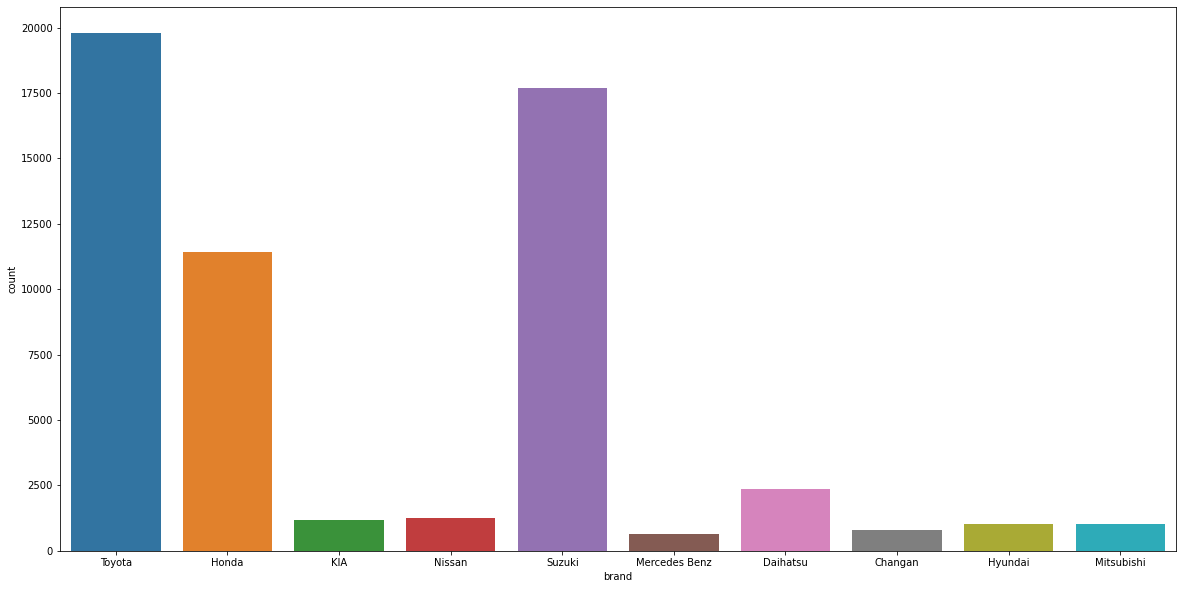

In [23]:
fig,ax=plt.subplots(figsize=(20,10))
counts=df['brand'].value_counts()
fcounts=counts[counts > 500].index
sns.countplot(x=df['brand'].loc[df['brand'].isin(fcounts)])

<AxesSubplot:xlabel='vehicle_transmission', ylabel='count'>

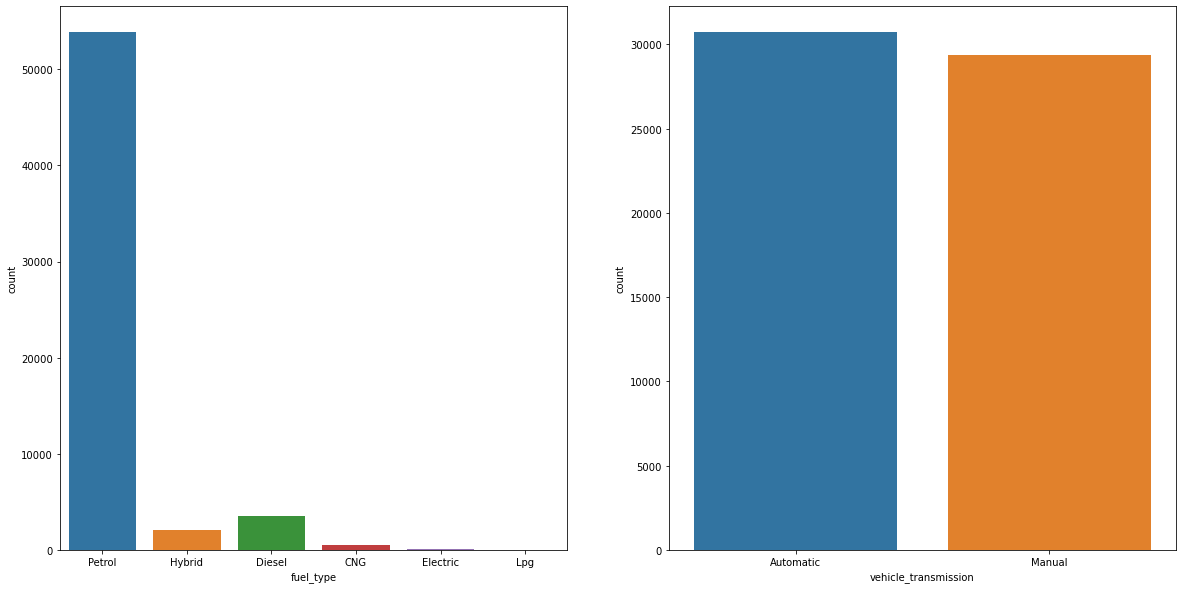

In [24]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['fuel_type'],ax=ax[0])
sns.countplot(x=df['vehicle_transmission'],ax=ax[1])

<AxesSubplot:xlabel='brand', ylabel='count'>

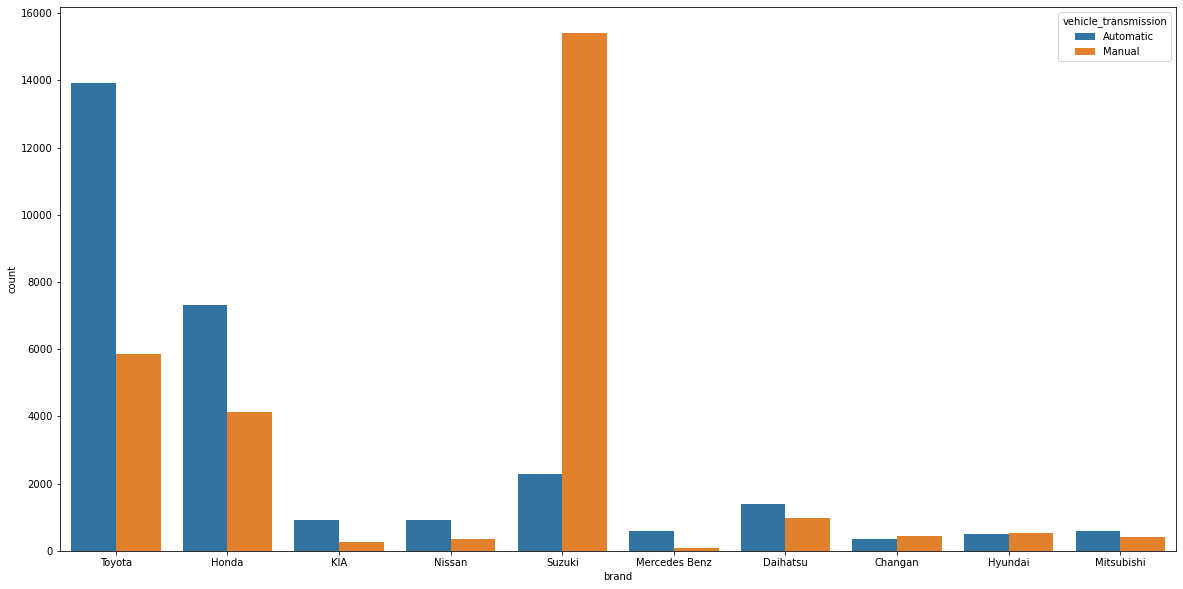

In [25]:
fig,ax=plt.subplots(figsize=(20,10))
counts=df['brand'].value_counts()
fcounts=counts[counts > 500].index
sns.countplot(x=df['brand'].loc[df['brand'].isin(fcounts)],hue=df['vehicle_transmission'])

<AxesSubplot:xlabel='brand', ylabel='count'>

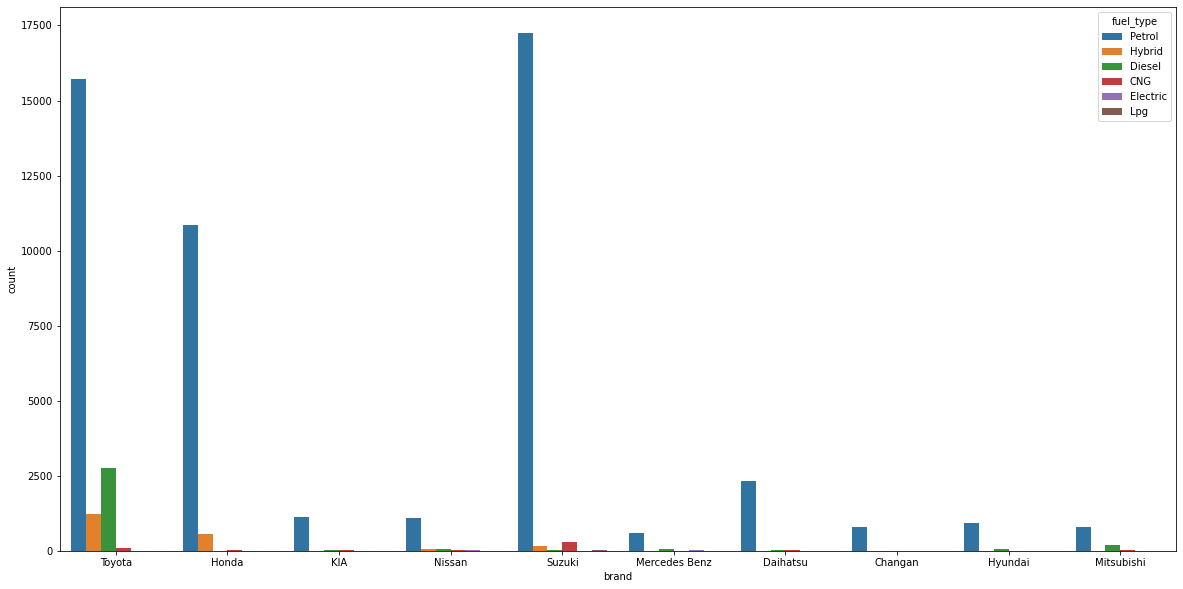

In [26]:
fig,ax=plt.subplots(figsize=(20,10))
counts=df['brand'].value_counts()
fcounts=counts[counts > 500].index
sns.countplot(x=df['brand'].loc[df['brand'].isin(fcounts)],hue=df['fuel_type'])

In [27]:
df.groupby(['brand','Car','vehicle_transmission'])['brand'].count()

brand          Car                               vehicle_transmission
Adam           Adam Revo                         Automatic                  4
                                                 Manual                     3
Alfa Romeo     Alfa Romeo Other                  Automatic                  1
Audi           Audi A                            Automatic                169
                                                 Manual                     1
               Audi Other                        Automatic                  2
               Audi Q                            Automatic                 29
               Audi TT                           Manual                     1
               Audi e-tron                       Automatic                 33
               Audi e-tron GT                    Automatic                  8
BAIC           BAIC BJ                           Automatic                 35
               BAIC Senova X                     Automatic              

In [28]:
df['brand']=le.fit_transform(df['brand'])
df['fuel_type']=le.fit_transform(df['fuel_type'])
df['vehicle_transmission']=le.fit_transform(df['vehicle_transmission'])
df['Car']=le.fit_transform(df['Car'])
df['city']=le.fit_transform(df['city'])


In [29]:
df=df.drop(['date'],axis=1)

In [30]:
df.isnull().sum()

brand                   0
fuel_type               0
model_date              0
price                   0
vehicle_transmission    0
Car                     0
city                    0
engine                  0
km                      0
dtype: int64

In [31]:
df.dropna(inplace=True)


In [32]:
df.replace('0', np.nan, inplace=True)


In [33]:
df.head()

,brand,fuel_type,model_date,price,vehicle_transmission,Car,city,engine,km
0,41,5,2021.0,6525000.0,0,207,137,1490,"6,000"
1,64,5,2012.0,1625000.0,1,434,88,1000,"68,000"
2,29,5,2015.0,2550000.0,0,117,137,1300,"150,000"
3,38,5,2022.0,9000000.0,0,191,218,3500,"18,000"
4,64,5,2015.0,3350000.0,0,445,192,1300,"110,000"


In [34]:
df = df.drop(df[df['city'] == '0'].index)


In [35]:
df['price'].min()

1780.0

In [36]:
df['km']=df['km'].str.replace(',', '').astype(float)

In [37]:
df = df.loc[df['engine'] != '']

In [38]:
non_numeric_price = pd.to_numeric(df['price'], errors='coerce').isna()

df = df[~non_numeric_price]
df['engine'] = df['engine'].astype(float)
df.dropna(inplace=True)

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [42]:
X= df.drop('price',axis=1)
Y=df['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [43]:
model=DecisionTreeRegressor()
model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [47]:
# df['Car'].value_counts()

In [48]:
# df.dropna(inplace=True)
# df.reset_index(drop=True, inplace=True)

In [49]:
# print(df['engine'].unique())


In [50]:
# df.loc[df['engine']=='nan']

In [51]:
# for column in df.columns:
#     print("================================================")
#     print(column)
#     print(df[column].unique())

In [53]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)

print("R-squared score:", r2)

R-squared score: 0.9445441437043535


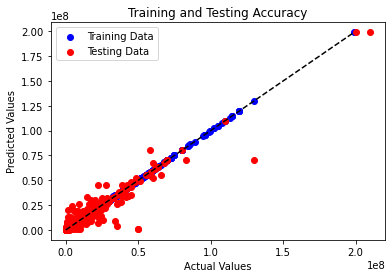

In [56]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.scatter(Y_train, y_train_pred, color='blue', label='Training Data')
plt.scatter(Y_test, y_test_pred, color='red', label='Testing Data')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], color='black', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

In [60]:
def cal_mape(y_true,y_pred):
    pct=np.abs((y_true-y_pred)/y_true)
    avg_pct=np.mean(pct)
    mape=(1-avg_pct)*100
    return mape
acc=cal_mape(Y_test,y_test_pred)

print("accuracy",acc)



accuracy 85.65202797468703


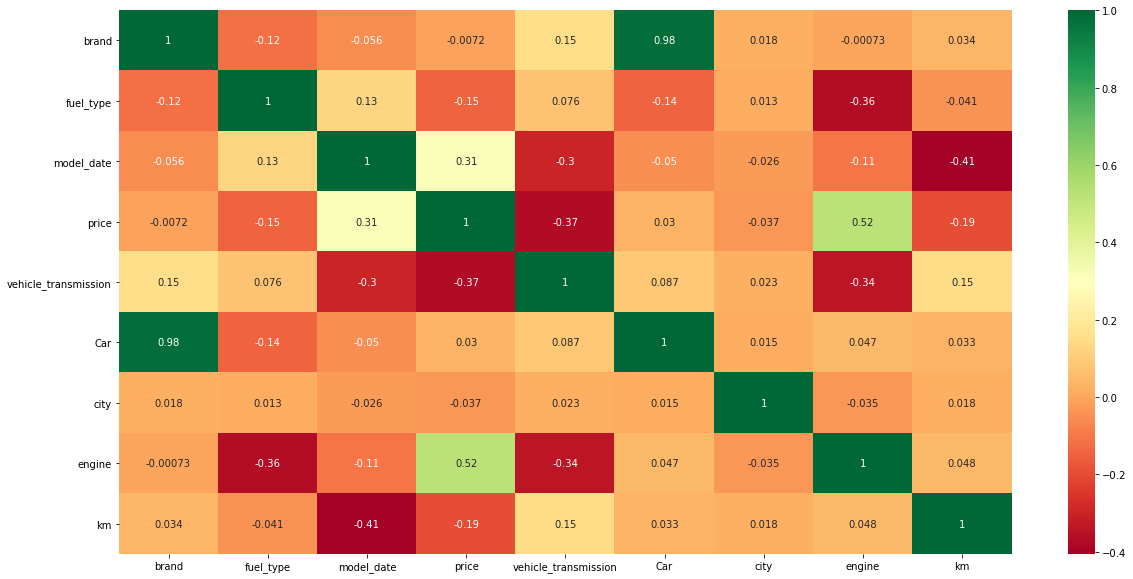

In [71]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
fig.set_size_inches(18,15)
plt.show()

In [72]:
model.score(X_test,Y_test)

0.9445441437043535

<AxesSubplot:ylabel='Density'>

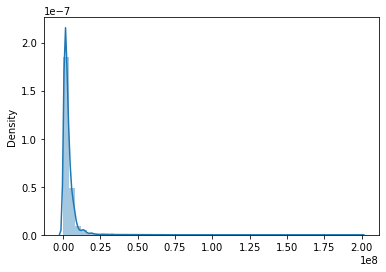

In [74]:
sns.distplot(y_test_pred)